Finished fitting KMeans with 1 clusters
Finished fitting KMeans with 2 clusters
Finished fitting KMeans with 3 clusters
Finished fitting KMeans with 4 clusters
Finished fitting KMeans with 5 clusters
Finished fitting KMeans with 6 clusters
Finished fitting KMeans with 7 clusters
Finished fitting KMeans with 8 clusters
Finished fitting KMeans with 9 clusters
Finished fitting KMeans with 10 clusters


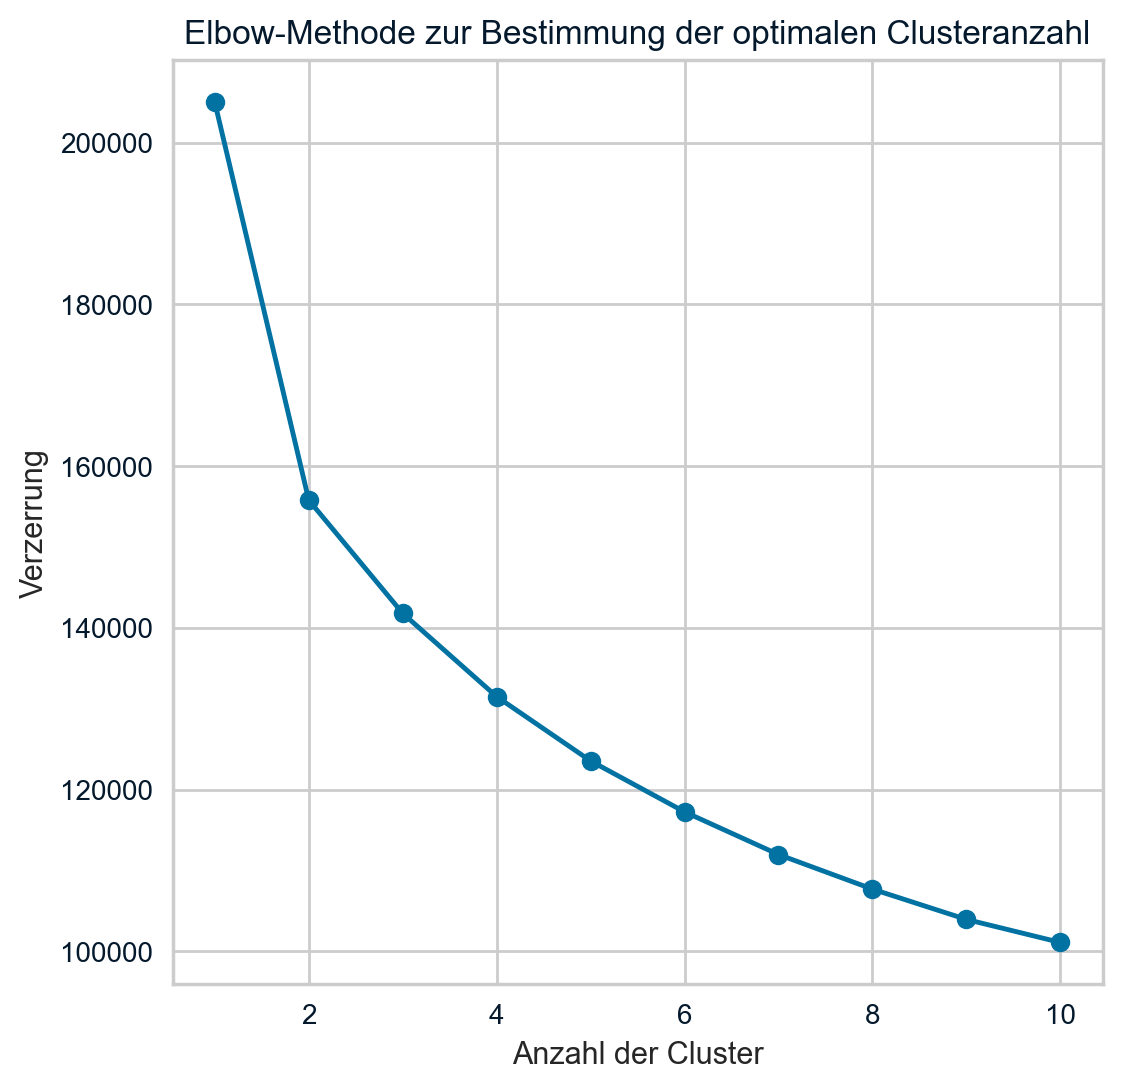

Für n_clusters = 2, ist der Silhouettenkoeffizient 0.3109210221201017)
Für n_clusters = 3, ist der Silhouettenkoeffizient 0.1456790611302879)
Für n_clusters = 4, ist der Silhouettenkoeffizient 0.11654519996952543)
Für n_clusters = 5, ist der Silhouettenkoeffizient 0.13460425716040508)
Für n_clusters = 6, ist der Silhouettenkoeffizient 0.11825100299429034)
Für n_clusters = 7, ist der Silhouettenkoeffizient 0.11990408016330738)
Für n_clusters = 8, ist der Silhouettenkoeffizient 0.11858570168994445)
Für n_clusters = 9, ist der Silhouettenkoeffizient 0.11459487219406238)
Shape von df_filtered: (15768, 61)
Shape von preds: (15768,)
Cluster 0: 2084 Datenpunkte
Cluster 1: 2433 Datenpunkte
Cluster 2: 1646 Datenpunkte
Cluster 3: 2548 Datenpunkte
Cluster 4: 815 Datenpunkte
Cluster 5: 1132 Datenpunkte
Cluster 6: 2258 Datenpunkte
Cluster 7: 615 Datenpunkte
Cluster 8: 2237 Datenpunkte


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer


df = pd.read_csv('short4python_clustering_v7.csv')


numerical_variables = ['BPM', 'LF', 'LFnu',  'HF', 'pNN20', 'pNN50', 'MAD', 'TP', 'BR', 'RMSSD']
  
covariate_variables = ['z_age', 'sex', 'z_BMI']
all_variables = numerical_variables + covariate_variables

# Imputation 
num_imputer = SimpleImputer(strategy='mean')
df[all_variables] = num_imputer.fit_transform(df[all_variables])

#  Exclusion of those with medication
df_filtered = df[(df['lithium'] != 1) & (df['antidepress'] != 1)]


X = df_filtered[all_variables]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20, random_state=100) 
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
    print(f"Finished fitting KMeans with {i} clusters")

# Elbow-Diagram
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Verzerrung')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl')
plt.show()

range_n_clusters = list(range(2, 10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=20, random_state=100) 
    preds = clusterer.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f"Für n_clusters = {n_clusters}, ist der Silhouettenkoeffizient {score})")


print(f"Shape von df_filtered: {df_filtered.shape}")
print(f"Shape von preds: {preds.shape}")

unique, counts = np.unique(preds, return_counts=True)


for cluster, size in zip(unique, counts):
    print(f"Cluster {cluster}: {size} Datenpunkte")


  

TIFF-Datei gespeichert unter: elbow_plot.tiff


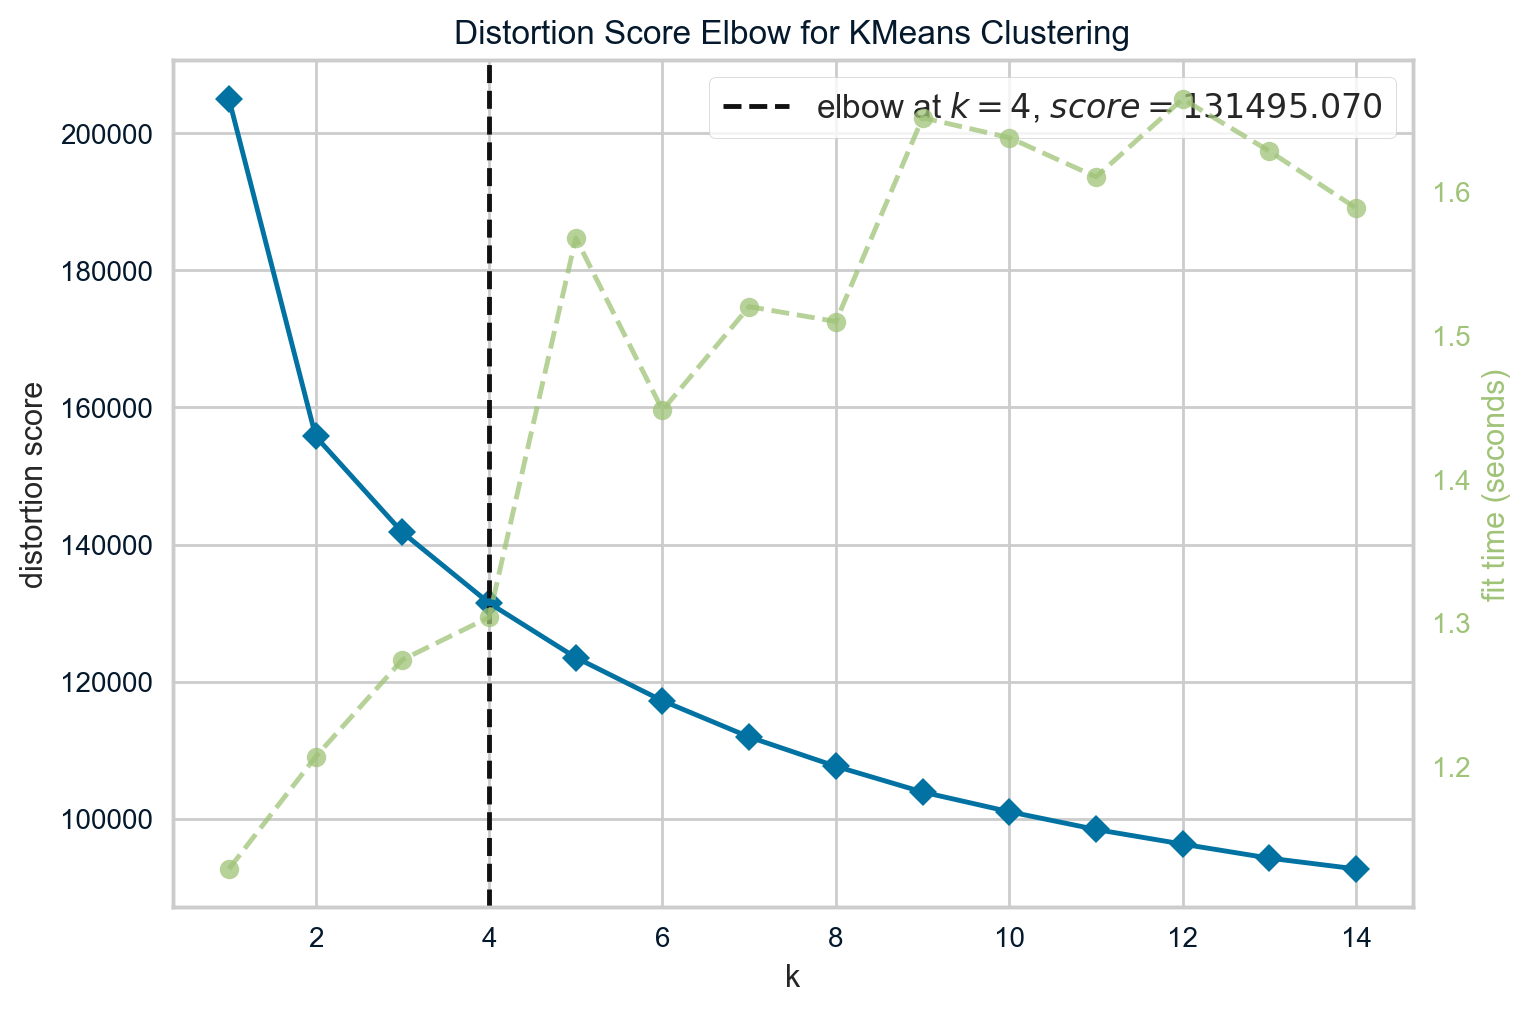

In [7]:
!pip install yellowbrick --quiet

import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

warnings.filterwarnings('ignore', category=FutureWarning)

# KMeans with stable parameters
model = KMeans(random_state=42, n_init=10)  

# Elbow-Visualizer
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)

# Clustering applied on data
visualizer.fit(X_scaled)


tiff_path = "elbow_plot.tiff" 
visualizer.show(outpath=tiff_path, dpi=600)

print(f"TIFF-Datei gespeichert unter: {tiff_path}")
